**Read in the cleaned up dataset from last time**

In [7]:
os.chdir("E:\\OneDrive - Johns Hopkins\\CurrentCourses\\553.688.Fall.2023\\Lectures - Nov\\Lecture 22")

In [1]:
import pandas as pd
import numpy as np
import datetime
import os

from sklearn.linear_model import LinearRegression

df=pd.read_csv("TRAFFIC_VOLUME2.csv")
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'date', 'time',
       'year', 'day1ofyear', 'dayofyear', 'hour', 'weekday', 'day',
       'time_diff', 'lrain', 'snowind', 'holiday_ind', 'daysin', 'daycos'],
      dtype='object')

We can drop some columns from the data frame if we like to get rid of some clutter.

In [2]:
df.drop(columns=["time_diff","date","snow_1h","holiday"],inplace=True)

In [3]:
df.columns

Index(['temp', 'rain_1h', 'clouds_all', 'weather_main', 'weather_description',
       'date_time', 'traffic_volume', 'time', 'year', 'day1ofyear',
       'dayofyear', 'hour', 'weekday', 'day', 'lrain', 'snowind',
       'holiday_ind', 'daysin', 'daycos'],
      dtype='object')

**Variable types**

Some of our variables are numerical and others are categorical.

To do regression in the sklearn package, we need to use a 2d numpy array of floats for all of the predictors.

Note that all predictor variable columns need be numerical.

We'll ultimately use indicators/one-hot encoding to deal with categorical variables.

For now, let's see how well a model using only the current numerical variables performs.

In [4]:
df.dtypes

temp                   float64
rain_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
time                    object
year                     int64
day1ofyear              object
dayofyear                int64
hour                   float64
weekday                  int64
day                      int64
lrain                  float64
snowind                  int64
holiday_ind              int64
daysin                 float64
daycos                 float64
dtype: object

**Create matrix with all numerical variables**

We'll extract all integer and float variable columns into a data frame.

Then we use the **values** method to create a numpy array from it.

First, we'll separate the response variable (traffic_volume) and save it as Y

In [15]:
Y=df.traffic_volume
df.drop(columns=["traffic_volume"],inplace=True)

In [16]:
floatcols=df.dtypes=="float64"
intcols=df.dtypes=="int64"
numcols=floatcols | intcols
print(numcols)

temp                    True
rain_1h                 True
clouds_all              True
weather_main           False
weather_description    False
date_time              False
time                   False
year                    True
day1ofyear             False
dayofyear               True
hour                    True
weekday                 True
day                     True
lrain                   True
snowind                 True
holiday_ind             True
daysin                  True
daycos                  True
dtype: bool


**Save numpy array of numerical columns**

In [17]:
dft=df.loc[:,numcols]
dft.shape

(40571, 13)

**Are there any columns with missing values?**

In [18]:
for i in range(dft.shape[1]):
    if dft.iloc[:,i].isna().sum()>0:
        print(dft.columns[i])

In [19]:
print(numcols)

temp                    True
rain_1h                 True
clouds_all              True
weather_main           False
weather_description    False
date_time              False
time                   False
year                    True
day1ofyear             False
dayofyear               True
hour                    True
weekday                 True
day                     True
lrain                   True
snowind                 True
holiday_ind             True
daysin                  True
daycos                  True
dtype: bool


In [20]:
X=df.loc[:,numcols].values

In [21]:
X.shape

(40571, 13)

**Separate data set into testing and training sets**

Break up dataset into three pieces for testing predictions. We'll use the first two datasets to learn a model and decide on an ultimate one to keep.

When we test the model to estimate its error rate, any use of the test data for fitting can contribute to bias in estimating the error and over-fitting.

We separate training and test datasets by randomly permuting the rows and taking 

- the first 1/3 of the rows for our first training dataset
- the second 1/3 of the rows for our second training dataset
- the final 1/3 of the rows for the test dataset

We won't look at the test dataset until we have arrived at a **single final model** and we're ready to determine performance of that model.

In [22]:
N=df.shape[0] # number of rows
perm=np.random.permutation(range(N))
Itrain1=perm[0:int(N/3)]
Itrain2=perm[int(N/3):int(2*N/3)]
Itest=perm[int(2*N/3):N]

In [23]:
Xtrain1=X[Itrain1,:]
Ytrain1=Y[Itrain1]
Xtrain2=X[Itrain2,:]
Ytrain2=Y[Itrain2]
Xtest=X[Itest,:]
Ytest=Y[Itest]

In [24]:
np.save("Xtrain1",Xtrain1)
np.save("Xtrain2",Xtrain2)
np.save("Ytrain1",Ytrain1)
np.save("Ytrain2",Xtrain2)
np.save("Xtest",Xtest)
np.save("Ytest",Ytest)

**Fit a regression model**

When we fit a linear regression model, the default for sklearn (*fit_interecept=True*) is to add an intercept to the preduction, equivalently, a column of 1's.

In [25]:
from sklearn.linear_model import LinearRegression
reg1= LinearRegression().fit(Xtrain1,Ytrain1)
print(reg1.coef_)
print(reg1.intercept_)

[ 3.88426748e+01 -9.76630731e+00  2.00155158e+00 -4.49745545e+05
 -1.23095352e+03  1.93841438e+01 -1.38877228e+02  1.23134814e+03
 -9.07526779e+01  2.05925791e+02 -3.63797881e-10  4.80669870e+02
 -1.36576949e+02]
905218948.1559255


**Determine performace on the second training dataset**

We measure performance by computing the average absolute difference between predicted and actual traffic volume values.

In [26]:
Xtrain2

array([[ 2.77930000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  7.73864792e-02, -9.97001170e-01],
       [ 2.70080000e+02,  0.00000000e+00,  9.00000000e+01, ...,
         1.00000000e+00,  6.01624063e-01, -7.98779373e-01],
       [ 2.71000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.79766586e-01, -9.83709294e-01],
       ...,
       [ 2.91330000e+02,  0.00000000e+00,  6.80000000e+01, ...,
         1.00000000e+00, -9.14127988e-01,  4.05425728e-01],
       [ 2.80860000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.20208045e-01,  9.92748722e-01],
       [ 2.70690000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  5.59589262e-01, -8.28770087e-01]])

In [27]:
# compute predictions on left out data (train2 dataset)
Ypred2=reg1.predict(Xtrain2)
# mean absolute difference between pred and actual traffic vols
sum(abs(Ypred2-Ytrain2))/len(Ytrain2)

1452.9775224327072

**How good is this?**

What if we predicted traffic volume without using any predictors, just the mean traffic volume in training set?

Equivalently, we use regression with just a single *intercept* column i.e. a column of 1's.

In [28]:
Xtrain1.shape

(13523, 13)

In [29]:
N1=Xtrain1.shape[0]
Xtrain1_interceptonly=np.ones((N1,1))
reg2= LinearRegression(fit_intercept=False).fit(Xtrain1_interceptonly,Ytrain1)
print(reg2.coef_)

#reg2= LinearRegression(fit_intercept=True).fit(Xtrain1_interceptonly,Ytrain1)
#print(reg2.intercept_)
#print(reg2.coef_)
print(Ytrain1.mean())

[3288.9418768]
3288.941876802485


In [30]:
# mean absolute difference between pred and actual traffic vols
sum(abs(Ytrain2-3252.826))/len(Ytrain2)

1748.491095829633

**Plot of True vs. Predicted**

C:\Users\dan\AppData\Local\Temp\ipykernel_29168\2691310678.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


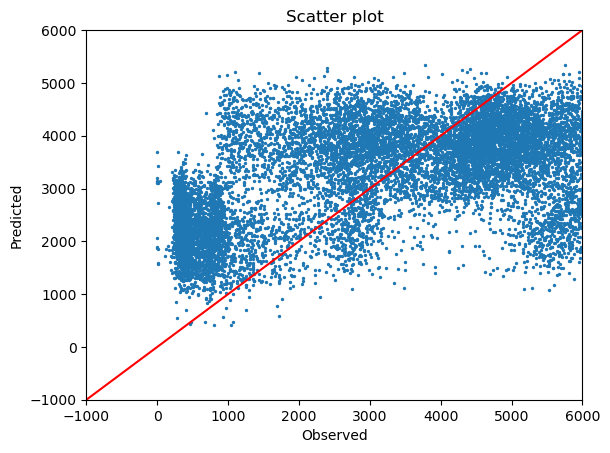

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart=-1000
lineEnd=6000

plt.scatter(Ytrain2, Ypred2,s=2)
plt.title('Scatter plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

**Day of the week**

One issue is that weekday is a numerical variable and so is treated like one.

So our model says that our prediction of traffic volume looks like:

$$
Y = \beta_0 + \beta_1 day + ...
$$

This doesn't make sense because it says, for example, that traffic on the day whose code is k is k times as heavy as traffic on day coded 1.

**Dummy/Indicator Variables**

We want weekday (day of the week) to be treated like a categorical variables. 

We deal with categorical variables using dummy/indicator variables.

We'll go back to the original data frame and create some dummy variables there starting with day of the week. 

Here, we create a dummy variable for every weekday, except we drop the first and view it as a "reference" weekday.

Once we've created dummy variables, we'll use concatenation to add these to our data frame.

**Start with the original dataframe**

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("TRAFFIC_VOLUME2.csv")
Y=df.loc[:,"traffic_volume"]
df.drop("traffic_volume",inplace=True,axis=1)

We create a dummy variable for day of the week.

One of the week day dummy variables will be used as a reference, so we drop the first day that appears (this becomes the reference day).

Once we have a data frame of those dummy columns, we concatenate that data frame with the one we started with.

In [2]:
weekday_dummies=pd.get_dummies(df["weekday"],drop_first=True,prefix="wday")
df=pd.concat([df,weekday_dummies],axis=1)
df.drop("weekday",axis=1,inplace=True)

In [3]:
weekday_dummies

,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
40566,0,0,0,0,0,1
40567,0,0,0,0,0,1
40568,0,0,0,0,0,1
40569,0,0,0,0,0,1


We can include all categorical values and then select one to drop to make it the reference.

In [4]:
weather_dummies=pd.get_dummies(df["weather_main"],prefix="W")
weather_dummies.head()

,W_Clear,W_Clouds,W_Drizzle,W_Haze,W_Mist,W_Other,W_Rain,W_Snow,W_Thunderstorm
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [5]:
weather_dummies.drop("W_Clear",axis=1,inplace=True)

In [6]:
df=pd.concat([df,weather_dummies],axis=1)

In [44]:
df.holiday.value_counts()

None                         40518
Columbus Day                     5
Veterans Day                     5
Thanksgiving Day                 5
Christmas Day                    5
New Years Day                    5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Labor Day                        5
Martin Luther King Jr Day        3
Name: holiday, dtype: int64

In [7]:
df["holiday_ind"]=(df.holiday!="None").astype(float)
df.drop(["holiday"],axis=1,inplace=True)

**Also, hour of day is treated as numerical**

Make it categorical and drop the original one.

In [8]:
hour_dummies=pd.get_dummies(df["hour"],drop_first=True,prefix="Hour")
df=pd.concat([df,hour_dummies],axis=1)

In [9]:
df.columns

Index(['Unnamed: 0', 'index', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time', 'date', 'time',
       'year', 'day1ofyear', 'dayofyear', 'hour', 'day', 'time_diff', 'lrain',
       'snowind', 'holiday_ind', 'daysin', 'daycos', 'wday_1', 'wday_2',
       'wday_3', 'wday_4', 'wday_5', 'wday_6', 'W_Clouds', 'W_Drizzle',
       'W_Haze', 'W_Mist', 'W_Other', 'W_Rain', 'W_Snow', 'W_Thunderstorm',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0'],
      dtype='object')

Make a list of predictor variable names to use.

In [10]:
pvarnames=["temp","lrain","snowind","clouds_all"]
pvarnames+=list(weekday_dummies.columns)
pvarnames+=list(weather_dummies.columns)
pvarnames+=list(hour_dummies.columns)
pvarnames+=["holiday_ind"]

In [11]:
pvarnames

['temp',
 'lrain',
 'snowind',
 'clouds_all',
 'wday_1',
 'wday_2',
 'wday_3',
 'wday_4',
 'wday_5',
 'wday_6',
 'W_Clouds',
 'W_Drizzle',
 'W_Haze',
 'W_Mist',
 'W_Other',
 'W_Rain',
 'W_Snow',
 'W_Thunderstorm',
 'Hour_1.0',
 'Hour_2.0',
 'Hour_3.0',
 'Hour_4.0',
 'Hour_5.0',
 'Hour_6.0',
 'Hour_7.0',
 'Hour_8.0',
 'Hour_9.0',
 'Hour_10.0',
 'Hour_11.0',
 'Hour_12.0',
 'Hour_13.0',
 'Hour_14.0',
 'Hour_15.0',
 'Hour_16.0',
 'Hour_17.0',
 'Hour_18.0',
 'Hour_19.0',
 'Hour_20.0',
 'Hour_21.0',
 'Hour_22.0',
 'Hour_23.0',
 'holiday_ind']

**Again separate training and testing**

We use same permutation of rows as above.

So the test set is still not looked at!!!

In [14]:
Xtrain1=df.loc[Itrain1,pvarnames].values
Ytrain1=Y[Itrain1]
Xtrain2=df.loc[Itrain2,pvarnames].values
Ytrain2=Y[Itrain2]
Xtest=df.loc[Itest,pvarnames].values
Ytest=Y[Itest]

In [16]:
from sklearn.linear_model import LinearRegression

reg3 = LinearRegression().fit(Xtrain1,Ytrain1)
print(reg3.coef_)
print(reg3.intercept_)
Ypred3=reg3.predict(Xtrain2)
sum(abs(Ypred3-Ytrain2))/len(Ypred3)

[ 6.23394353e+00 -8.42381823e+01 -7.85797281e+02 -4.18700435e-01
  2.37548290e+02  2.93032945e+02  3.29249641e+02  3.49291088e+02
 -4.88850966e+02 -8.96826445e+02  1.21293732e+00  5.65260870e+01
 -9.68402758e+01  1.15856096e+01  1.39057878e+02 -4.30919120e+01
 -1.90501902e+02 -1.12069357e+02 -3.50477730e+02 -5.06253831e+02
 -4.71176127e+02 -1.52125769e+02  1.27197651e+03  3.32752621e+03
  4.03211043e+03  3.78305900e+03  3.54243396e+03  3.35205028e+03
  3.59870434e+03  3.85614568e+03  3.87292487e+03  4.07285202e+03
  4.34108718e+03  4.85786071e+03  4.46915429e+03  3.39229649e+03
  2.41920453e+03  1.99414384e+03  1.82548371e+03  1.34342730e+03
  6.45273703e+02 -1.47081825e+02]
-824.6612537974929


579.2691301673082

C:\Users\dqnai\AppData\Local\Temp\ipykernel_18804\1559716307.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


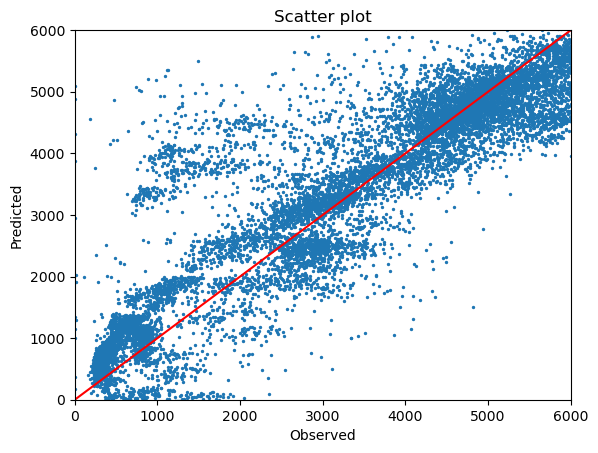

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart,lineEnd=0,6000

plt.scatter(Ytrain2, Ypred3,s=2)
plt.title('Scatter plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

**Quadratic terms**

How about including products of columns as predictors?

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=True)
Xtrain1Q=poly.fit_transform(Xtrain1)
Xtrain2Q=poly.fit_transform(Xtrain2)
XtestQ=poly.fit_transform(Xtest)
print(Xtrain1Q.shape)

(13523, 904)


In [19]:
reg4 = LinearRegression().fit(Xtrain1Q,Ytrain1)
Ypred4=reg4.predict(Xtrain2Q)
sum(abs(Ypred4-Ytrain2))/len(Ytrain2)

25374.123925313972

C:\Users\dqnai\AppData\Local\Temp\ipykernel_18804\455761765.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


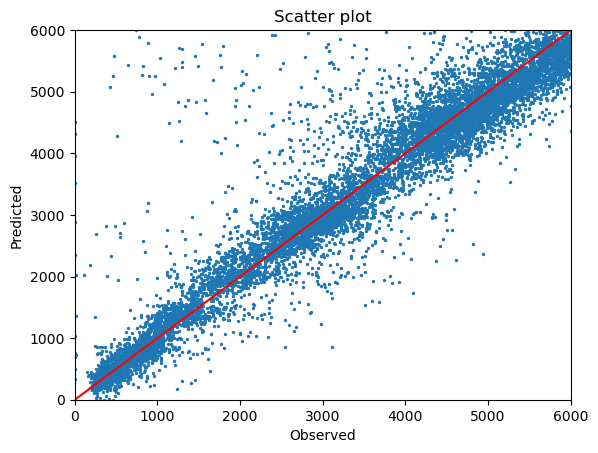

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart,lineEnd=0,6000

plt.scatter(Ytrain2, Ypred4,s=2)
plt.title('Scatter plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

**Why does this look so good when the mean absolute error looks so bad?**

**Regression Trees**

In [21]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(Xtrain1, Ytrain1)
Ypred2=clf.predict(Xtrain2)
sum(abs(Ypred2-Ytrain2))/len(Ypred2)

398.92369121561666

In [22]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(Xtrain1Q, Ytrain1)
Ypred2=clf.predict(Xtrain2Q)
sum(abs(Ypred2-Ytrain2))/len(Ypred2)

407.80693581780537

C:\Users\dqnai\AppData\Local\Temp\ipykernel_18804\957440864.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


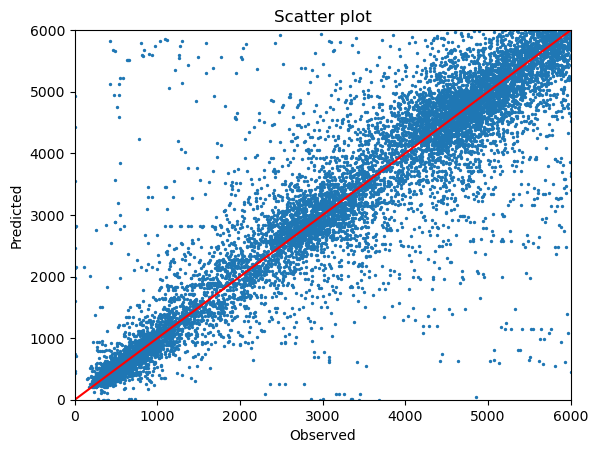

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart,lineEnd=0,6000

plt.scatter(Ytrain2, Ypred2,s=2)
plt.title('Scatter plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

**Quantification of out of sample error**

We've tried several methods, and the decision tree approach seems to be the best. 
Now we use all of the training data to build a single classifier and get the error rate on the test data (which we have not touched yet).

In [24]:
Xtrain=np.concatenate([Xtrain1,Xtrain2])
Ytrain=np.concatenate([Ytrain1,Ytrain2])
clf = tree.DecisionTreeRegressor()
clf = clf.fit(Xtrain, Ytrain)
Ypred=clf.predict(Xtest)
sum(abs(Ypred-Ytest))/len(Ypred)

397.91696243714875

C:\Users\dqnai\AppData\Local\Temp\ipykernel_18804\1223072596.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')


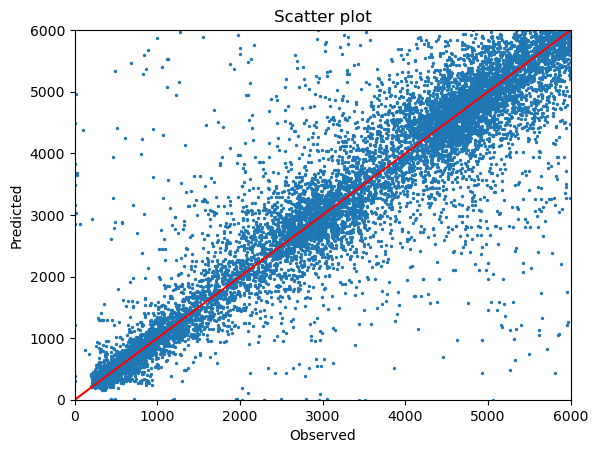

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

lineStart,lineEnd=0,6000

plt.scatter(Ytest, Ypred,s=2)
plt.title('Scatter plot')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()